In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer_churn_prediction.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6059,7325-ENZFI,Female,0,No,No,39,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),40.30,1630.4,No
1419,3498-LZGQZ,Male,0,Yes,Yes,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.15,1177.05,No
1893,3466-WAESX,Male,0,No,Yes,16,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,69.10,1083.7,No
871,1573-LGXBA,Male,0,Yes,Yes,57,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),97.55,5598,No
1208,5494-HECPR,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,80.25,Yes


In [3]:
#Drop column
#the inplace will drop the columns and update the table
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4176,Male,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,342.3,No
1964,Male,0,No,No,66,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,Yes,Mailed check,54.80,3465.7,No
4911,Male,1,Yes,No,72,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.80,6141.65,No
4357,Female,0,Yes,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.45,330.8,No
4622,Male,0,No,No,52,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),83.80,4331.4,No


In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
# Converting total charges from object to flaot
#pd.to_numeric will convert object into float and remove if there any space
pd.to_numeric(df.TotalCharges, errors='coerce')
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [10]:
df.shape

(7043, 20)

In [11]:
# for finding specific record/indexing
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
#Converted object of TotalCharges into float64
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\user\AppData\Local\Temp\ipykernel_15596\2945046392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [16]:
df1.TotalCharges.dtype

dtype('float64')

In [17]:
#Customers data with all the value 'NO'
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


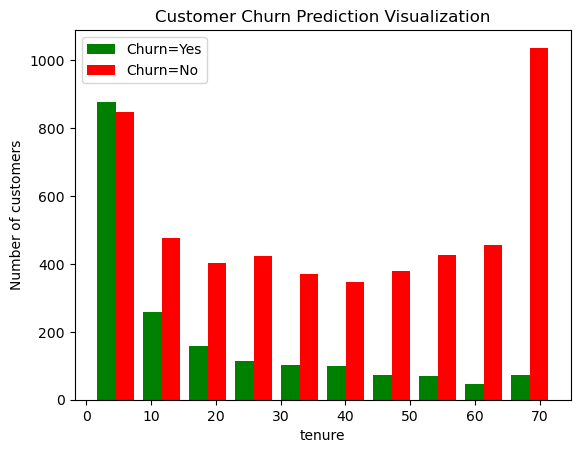

In [18]:
#for getting specific value with 'No' tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green', 'red'], label=['Churn=Yes','Churn=No'])
plt.legend()

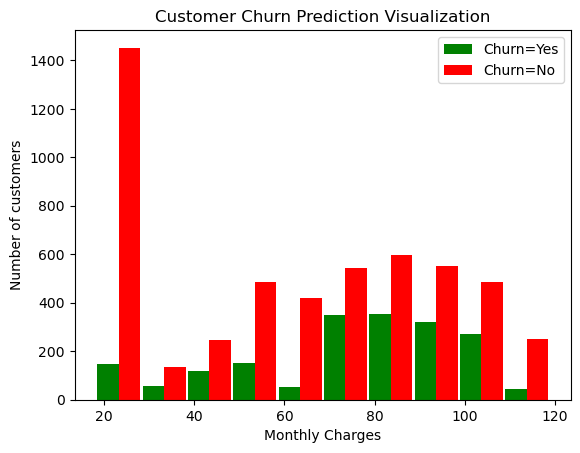

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [20]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column} : {df[column].unique()}')

In [21]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
# Data Cleaning 

# for modifying in the data

df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace = True)



C:\Users\user\AppData\Local\Temp\ipykernel_15596\329293095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15596\329293095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace = True)


In [23]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines',
                  'OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies',
                 'PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15596\3896145789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace=True)


In [25]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [26]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15596\3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [27]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
 df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5610,1,0,0,0,3,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
398,0,1,0,0,33,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5362,0,0,1,1,65,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4998,0,1,0,0,62,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
# Scaling the other columns outside the range of 0 and 1, we have scale all the data between 0 and 1
# For scaling we use min and max scaler

cols_to_scale =['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# After MinMaxScaler then apply fit and transform

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3102,1,0,0,0,0.056338,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
5812,0,0,1,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5713,0,1,0,0,0.676056,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1461,0,0,1,0,0.295775,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [33]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [34]:
# Train, Test and split Model

X = df2.drop('Churn', axis='columns')
y = df2['Churn']


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [36]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [40]:
len(X_train.columns)

26

In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):    
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
        keras.layers.Dense(15,  activation = 'relu'),
        keras.layers.Dense(1,  activation = 'sigmoid')
    ])
    # binary_crossentropy is used for the output is in the form of 0 and 1
    model.compile(optimizer='adam',
                 loss = 'binary_crossentropy',
                  metrics = ['accuracy']
                 )
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
        
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 776us/step - loss: 0.5978 - accuracy: 0.6635
Epoch 2/100
176/176 [==============================] - 0s 744us/step - loss: 0.4364 - accuracy: 0.7937
Epoch 3/100
176/176 [==============================] - 0s 749us/step - loss: 0.4198 - accuracy: 0.8015
Epoch 4/100
176/176 [==============================] - 0s 726us/step - loss: 0.4083 - accuracy: 0.8123
Epoch 5/100
176/176 [==============================] - 0s 749us/step - loss: 0.4046 - accuracy: 0.8201
Epoch 6/100
176/176 [==============================] - 0s 737us/step - loss: 0.4114 - accuracy: 0.8098
Epoch 7/100
176/176 [==============================] - 0s 754us/step - loss: 0.3993 - accuracy: 0.8199
Epoch 8/100
176/176 [==============================] - 0s 749us/step - loss: 0.3929 - accuracy: 0.8235
Epoch 9/100
176/176 [==============================] - 0s 743us/step - loss: 0.4074 - accuracy: 0.8031
Epoch 10/100
176/176 [==============================] - 0s 731us/step - l

176/176 [==============================] - 0s 777us/step - loss: 0.3544 - accuracy: 0.8373
Epoch 80/100
176/176 [==============================] - 0s 703us/step - loss: 0.3343 - accuracy: 0.8458
Epoch 81/100
176/176 [==============================] - 0s 714us/step - loss: 0.3510 - accuracy: 0.8356
Epoch 82/100
176/176 [==============================] - 0s 709us/step - loss: 0.3403 - accuracy: 0.8432
Epoch 83/100
176/176 [==============================] - 0s 703us/step - loss: 0.3551 - accuracy: 0.8351
Epoch 84/100
176/176 [==============================] - 0s 703us/step - loss: 0.3491 - accuracy: 0.8330
Epoch 85/100
176/176 [==============================] - 0s 703us/step - loss: 0.3325 - accuracy: 0.8439
Epoch 86/100
176/176 [==============================] - 0s 697us/step - loss: 0.3449 - accuracy: 0.8372
Epoch 87/100
176/176 [==============================] - 0s 697us/step - loss: 0.3410 - accuracy: 0.8397
Epoch 88/100
176/176 [==============================] - 0s 709us/step - loss:

In [43]:
# Applying Imbalance technique
# 1. Underlying sampling majority class

count_class_0, count_class_1 = df1.Churn.value_counts()

#Divide by class
df_class_0 = df2[df2['Churn']== 0]
df_class_1 = df2[df2['Churn']== 1]

In [44]:
count_class_0, count_class_1

(5163, 1869)

In [45]:
df_class_0.shape

(5163, 27)

In [46]:
df_class_1.shape

(1869, 27)

In [47]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)


print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [48]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y )

In [49]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 860us/step - loss: 0.7380 - accuracy: 0.5856
Epoch 2/100
94/94 [==============================] - 0s 817us/step - loss: 0.5368 - accuracy: 0.7396
Epoch 3/100
94/94 [==============================] - 0s 839us/step - loss: 0.4993 - accuracy: 0.7617
Epoch 4/100
94/94 [==============================] - 0s 796us/step - loss: 0.5009 - accuracy: 0.7611
Epoch 5/100
94/94 [==============================] - 0s 785us/step - loss: 0.4844 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 839us/step - loss: 0.4899 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 774us/step - loss: 0.4921 - accuracy: 0.7518
Epoch 8/100
94/94 [==============================] - 0s 817us/step - loss: 0.4795 - accuracy: 0.7665
Epoch 9/100
94/94 [==============================] - 0s 796us/step - loss: 0.4745 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 796us/step - loss: 0.4716 - accura

94/94 [==============================] - 0s 677us/step - loss: 0.3808 - accuracy: 0.8341
Epoch 82/100
94/94 [==============================] - 0s 710us/step - loss: 0.3786 - accuracy: 0.8361
Epoch 83/100
94/94 [==============================] - 0s 710us/step - loss: 0.4048 - accuracy: 0.8085
Epoch 84/100
94/94 [==============================] - 0s 699us/step - loss: 0.3827 - accuracy: 0.8241
Epoch 85/100
94/94 [==============================] - 0s 688us/step - loss: 0.3948 - accuracy: 0.8289
Epoch 86/100
94/94 [==============================] - 0s 688us/step - loss: 0.3987 - accuracy: 0.8199
Epoch 87/100
94/94 [==============================] - 0s 731us/step - loss: 0.3724 - accuracy: 0.8362
Epoch 88/100
94/94 [==============================] - 0s 688us/step - loss: 0.3723 - accuracy: 0.8322
Epoch 89/100
94/94 [==============================] - 0s 677us/step - loss: 0.3797 - accuracy: 0.8195
Epoch 90/100
94/94 [==============================] - 0s 677us/step - loss: 0.3700 - accuracy: 

In [51]:
model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

## Method2: Oversampling

In [ ]:
count_class_0, count_class_1

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)


df_test_over = pd.concat([df_class_0, df_class_1_over],axis=0)
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

In [ ]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y )

In [ ]:
y_train.value_counts()

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [ ]:
yp = model.predict(X_test)
yp[:5]

## Method3: SMOTE

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']


In [ ]:
y.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_test.value_counts()

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## Method4: Use of Ensemble with undersampling

In [ ]:
df2.Churn.value_counts()

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

In [ ]:
4130/3

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

df3_class_0 = df3[df3['Churn']== 0]
df3_class_1 = df3[df3['Churn']== 1]

In [ ]:
df3_class_0.shape, df3_class_1.shape

In [ ]:
def get_train_batch(df_majority,df_minority, start,end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    X_train = df_train.drop('Churn', axis = 'columns')
    y_train = df_train.Churn
    
    return X_train, y_train
    

In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [ ]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
print(classification_report(y_test, y_pred_final))

In [ ]:
y_test[:10]

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [ ]:
y_pred[:10]

In [ ]:
# Printing classification report
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))


In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
(1005+269)/(1005+269+80+56)